> This is my First Competition in Kaggle!!!
> Looking forward to learn a lot
# Import necessary libraries and load the data

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Loading the data in pandas dataframe
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
test = test.merge(gender_submission,on='PassengerId')
train = pd.read_csv("../input/titanic/train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
train.Cabin = train.Cabin.fillna('R')
train.Cabin=train.Cabin.str.extract('([A-Z])', expand=False)
train.Cabin.unique()
test.Cabin = test.Cabin.fillna('R')
test.Cabin=test.Cabin.str.extract('([A-Z])', expand=False)
test.Cabin.unique()

array(['R', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

array(['R', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

# Analysing the data in each column

In [323]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)
train.Title.value_counts()
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)
train.Title.isin(test.Title)
test.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Mme           1
Lady          1
Countess      1
Ms            1
Capt          1
Don           1
Sir           1
Name: Title, dtype: int64

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Title, Length: 891, dtype: bool

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [324]:
def data_clean(df):
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
    #assign a value for missing titles
    df['Title'] = df['Title'].fillna('NoTitle')
    #Unify titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    new_y = df.Survived
    new_X = df.drop(columns = ['Survived','Ticket','Name'])
    new_X=new_X.set_index('PassengerId')
    new_X.info()
    
    return new_X,new_y
X_train,y_train = data_clean(train)
print("X_train - Info")
X_train.info()
X_test,y_test = data_clean(test)
print("X_test - Info")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 69.6+ KB
X_train - Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 69.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Da

# Categorizing the Age and Fare columns
# Filling the missing values

In [325]:
def categor_age_fare(df):
    # fill missing values
    df.Age=df.Age.fillna(df.Age.median())
    #create bands for age
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[ (df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[ (df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[ (df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4
    df['Age'] = df['Age'].astype(int)

    df.Fare=df.Fare.fillna(df.Age.median())
    #create bands for fare
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[ (df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[ (df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df.Fare = df.Fare.astype(int)
    return df

X_train = categor_age_fare(X_train)
print("X_train - Info")
X_train.info()
X_test = categor_age_fare(X_test)
print("X_test - Info")
X_test.info()
X= pd.concat([X_train,X_test])
train['Agegrouped']=X_train.Age
train['Faregrouped']=X_train.Fare
X_train=X_train.drop(columns = ['Fare'])
X_test=X_test.drop(columns = ['Fare'])

X_train - Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Cabin       891 non-null object
Embarked    889 non-null object
Title       891 non-null object
dtypes: int64(5), object(4)
memory usage: 69.6+ KB
X_test - Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Cabin       418 non-null object
Embarked    418 non-null object
Title       418 non-null object
dtypes: int64(5), object(4)
memory usage: 32.7+ KB


# Filter categorical columns using mask and turn it into a list

In [326]:
categorical_feature_mask = X_train.dtypes==object
categorical_cols = X_train.columns[categorical_feature_mask].tolist()

# Generate LastName column from Name by using the separator ','

In [327]:
train['LastName'] = train.Name.apply(lambda x:x.split(sep=',')[0])
print(str(train.LastName.value_counts().count())+" unique Lastnames are there\n")

667 unique Lastnames are there



> 667 uniques Lastnames are huge and we can use that as a feature in our classification models

# Import labelencoder to encode categorical values

In [328]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
X_train.Sex = le.fit_transform(X_train.Sex)
X_test.Sex = le.fit_transform(X_test.Sex)
X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().idxmax())
X_train.Embarked = le.fit_transform(X_train.Embarked)
X_test.Embarked = X_test.Embarked.fillna(X_test['Embarked'].value_counts().idxmax())
X_test.Embarked = le.fit_transform(X_test.Embarked)
X_train.Title = X_train.Title.fillna(X_train['Title'].value_counts().idxmax())
X_train.Title = le.fit_transform(X_train.Title)
X_test.Title = X_test.Title.fillna(X_test['Title'].value_counts().idxmax())
X_test.Title = le.fit_transform(X_test.Title)
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().idxmax())
#X_train.Cabin = le.fit_transform(X_train.Cabin)
#X_test.Cabin = X_test.Cabin.fillna(X_test['Cabin'].value_counts().idxmax())
#X_test.Cabin = le.fit_transform(X_test.Cabin)

# Encoding the categorical values with one hot encoder

In [329]:
#Processing feature: Pclass and Embarked
#splitting each feature into new binary features 

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass",'Age','Embarked','Cabin','Title']
X_ohe_train=dummy_data(X_train, dummy_columns)
display(X_ohe_train.head())
X_ohe_test = dummy_data(X_test, dummy_columns)
X_ohe_test.insert(X_ohe_train.columns.get_loc("Cabin_T"),"Cabin_T",0)
display(X_ohe_test.head())

,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,...,Cabin_E,Cabin_F,Cabin_G,Cabin_R,Cabin_T,Title_0,Title_1,Title_2,Title_3,Title_4
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,...,Cabin_E,Cabin_F,Cabin_G,Cabin_R,Cabin_T,Title_0,Title_1,Title_2,Title_3,Title_4
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
893,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
894,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
895,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
896,0,1,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Feature scaling needs to be done for continuous columns

In [330]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0, 1))
# To scale data 
X_train_minmax = X_ohe_train
X_test_minmax = X_ohe_test
X_train_minmax.iloc[:,1:3]=min_max.fit_transform(X_train_minmax.iloc[:,1:3])
X_test_minmax.iloc[:,1:3]=min_max.fit_transform(X_test_minmax.iloc[:,1:3])

# Lets visualize the the data grouped by Sex

percentage of people survived : 38.0


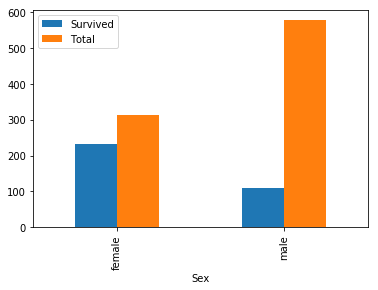

In [331]:
# of people survived grouped by sex
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_sex = train.groupby('Sex').sum().Survived.to_frame()
groupby_sex['Total'] = train.groupby('Sex').count().Survived
groupby_sex.plot.bar()
plt.show()

# Lets visualize the the data grouped by Age

percentage of people survived : 38.0


Text(0.5, 0, 'Age Range')

Text(0, 0.5, 'Count')

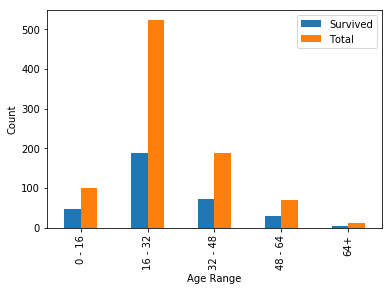

In [332]:
# of people survived grouped by age
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_age = train.groupby('Agegrouped').sum().Survived.to_frame()
groupby_age['Total'] = train.groupby('Agegrouped').count().Survived
groupby_age.index = groupby_age.index.map({0:'0 - 16',1:'16 - 32',2:'32 - 48',3:'48 - 64',4:'64+'})
groupby_age.plot.bar()
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

# Lets visualize the the data grouped by Title

percentage of people survived : 38.0


Text(0, 0.5, 'Count')

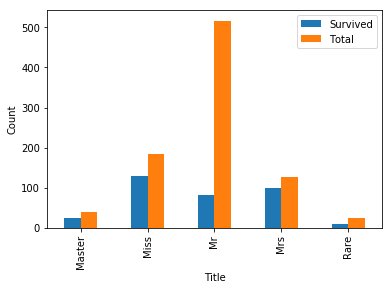

In [333]:
# of people survived grouped by age
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_title = train.groupby('Title').sum().Survived.to_frame()
groupby_title['Total'] = train.groupby('Title').count().Survived
groupby_title.plot.bar()
plt.ylabel('Count')
plt.show()

> From the above visualization, we can understand that '**Mrs**' have survived a lot than '**Miss**'.
> So it conveys that the married women have more probability to survive than unmarrieds.

percentage of people survived : 38.0


Text(0.5, 0, 'Fare Range')

Text(0, 0.5, 'Count')

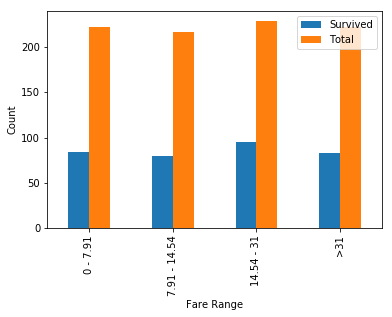

In [334]:
# of people survived grouped by age
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_age = train.groupby('Faregrouped').sum().Survived.to_frame()
groupby_age['Total'] = train.groupby('Faregrouped').count().Survived
groupby_age.index = groupby_age.index.map({0:'0 - 7.91',1:'7.91 - 14.54',2:'14.54 - 31',3:'>31'})
groupby_age.plot.bar()
plt.xlabel('Fare Range')
plt.ylabel('Count')
plt.show()

percentage of people survived : 38.0


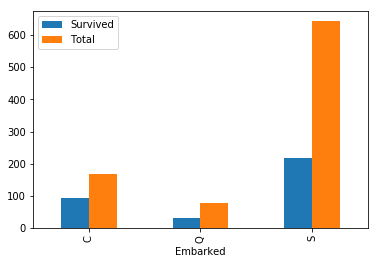

In [335]:
# of people survived grouped by sex
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_embarked = train.groupby('Embarked').sum().Survived.to_frame()
groupby_embarked['Total'] = train.groupby('Embarked').count().Survived
groupby_embarked.plot.bar()
plt.show()

> From the above visualization, we can see that the people who have boarded at cherbourg have high probability to survive than others.

percentage of people survived : 38.0


,Survived,Total
Cabin,,
A,7,15
B,35,47
C,35,59
D,25,33
E,24,32
F,8,13
G,2,4
R,206,687
T,0,1


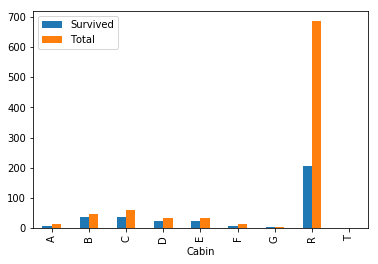

In [336]:
# of people survived grouped by sex
print("percentage of people survived :",round(y_train.sum()/y_train.count(),2)*100)
groupby_cabin = ctrain.groupby('Cabin').sum().Survived.to_frame()
groupby_cabin['Total'] = ctrain.groupby('Cabin').count().Survived
groupby_cabin
groupby_cabin.plot.bar()
plt.show()

# Linear Regression

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
#X_train = MinMaxScaler().fit_transform(X_train)
lr.fit(X_train_minmax,y_train)
y_pred = lr.predict(X_test_minmax)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",lr.score(X_test_minmax, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Accuracy: 0.521847875494706


# Random Forest Classifier

In [338]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_minmax,y_train)

y_pred=clf.predict(X_test_minmax)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Find accuracy of each model

In [339]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)
roc_score = roc_auc_score(y_test, y_pred)
print("ROC_AUC_SCORE : ",roc_score)
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",CM)
report = classification_report(y_test, y_pred)
print("Classification Report :\n",report)

Accuracy: 0.84688995215311
ROC_AUC_SCORE :  0.8402255639097744
Confusion Matrix : 
 [[230  36]
 [ 28 124]]
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       266
           1       0.78      0.82      0.79       152

    accuracy                           0.85       418
   macro avg       0.83      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



# Neural Network using tensorflow

In [340]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(20, activation='relu',input_shape=(X_train_minmax.shape[1],)))
model.add(Dense(30, activation='softmax'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

#train model
model.fit(X_train_minmax, y_train, validation_split=0.4, epochs=100, callbacks=[early_stopping_monitor])

Train on 534 samples, validate on 357 samples
Epoch 1/100
534/534 [==============================] - 0s 575us/step - loss: 0.8530 - acc: 0.3876 - val_loss: 0.8549 - val_acc: 0.3782
Epoch 2/100
534/534 [==============================] - 0s 85us/step - loss: 0.8431 - acc: 0.3876 - val_loss: 0.8449 - val_acc: 0.3782
Epoch 3/100
534/534 [==============================] - 0s 81us/step - loss: 0.8336 - acc: 0.3876 - val_loss: 0.8349 - val_acc: 0.3782
Epoch 4/100
534/534 [==============================] - 0s 79us/step - loss: 0.8242 - acc: 0.3876 - val_loss: 0.8256 - val_acc: 0.3782
Epoch 5/100
534/534 [==============================] - 0s 79us/step - loss: 0.8153 - acc: 0.3876 - val_loss: 0.8166 - val_acc: 0.3782
Epoch 6/100
534/534 [==============================] - 0s 79us/step - loss: 0.8069 - acc: 0.3876 - val_loss: 0.8079 - val_acc: 0.3782
Epoch 7/100
534/534 [==============================] - 0s 83us/step - loss: 0.7986 - acc: 0.3876 - val_loss: 0.7995 - val_acc: 0.3782
Epoch 8/100
534

534/534 [==============================] - 0s 80us/step - loss: 0.5428 - acc: 0.8408 - val_loss: 0.5559 - val_acc: 0.8151
Epoch 62/100
534/534 [==============================] - 0s 84us/step - loss: 0.5375 - acc: 0.8483 - val_loss: 0.5509 - val_acc: 0.8179
Epoch 63/100
534/534 [==============================] - 0s 80us/step - loss: 0.5323 - acc: 0.8521 - val_loss: 0.5467 - val_acc: 0.8235
Epoch 64/100
534/534 [==============================] - 0s 84us/step - loss: 0.5290 - acc: 0.8521 - val_loss: 0.5435 - val_acc: 0.8235
Epoch 65/100
534/534 [==============================] - 0s 78us/step - loss: 0.5254 - acc: 0.8502 - val_loss: 0.5394 - val_acc: 0.8263
Epoch 66/100
534/534 [==============================] - 0s 78us/step - loss: 0.5214 - acc: 0.8521 - val_loss: 0.5377 - val_acc: 0.8179
Epoch 67/100
534/534 [==============================] - 0s 85us/step - loss: 0.5179 - acc: 0.8502 - val_loss: 0.5343 - val_acc: 0.8207
Epoch 68/100
534/534 [==============================] - 0s 80us/step

In [341]:
y_pred = (model.predict(X_test_minmax)>=0.5).astype('int64')
accuracy = model.evaluate(X_test_minmax,y_test,verbose = 0)[1]
print("Accuracy score of the neural network is :",accuracy)

Accuracy score of the neural network is : 0.880382776260376


# Generating the final results and saving it in a CSV file

In [342]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)
roc_score = roc_auc_score(y_test, y_pred)
print("ROC_AUC_SCORE : ",roc_score)
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",CM)
report = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report :\n",report)

Accuracy: 0.8803827751196173
ROC_AUC_SCORE :  0.8594924812030075
Confusion Matrix : 
 [[249  17]
 [ 33 119]]
Classification Report :
 {'0': {'precision': 0.8829787234042553, 'recall': 0.9360902255639098, 'f1-score': 0.9087591240875912, 'support': 266}, '1': {'precision': 0.875, 'recall': 0.7828947368421053, 'f1-score': 0.826388888888889, 'support': 152}, 'accuracy': 0.8803827751196173, 'macro avg': {'precision': 0.8789893617021276, 'recall': 0.8594924812030076, 'f1-score': 0.86757400648824, 'support': 418}, 'weighted avg': {'precision': 0.8800773694390716, 'recall': 0.8803827751196173, 'f1-score': 0.8788063112880631, 'support': 418}}


In [343]:
final_results = pd.DataFrame(y_pred, columns = ['Survived'])
final_results['PassengerId'] = gender_submission.PassengerId
final_results=final_results.set_index('PassengerId')
final_results.to_csv('FinalResults-'+str(round(accuracy,2))+'-'+str(CM[0][1])+','+str(CM[1][0])+'.csv')
print("Output CSV file has been saved "+'FinalResults-'+str(round(accuracy,2))+'-'+str(CM[0][1])+','+str(CM[1][0])+'.csv')

Output CSV file has been saved FinalResults-0.88-17,33.csv
